In [89]:
from tools import analysistools as atools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random

In [84]:
xyzapath = '/Users/joelforster/Projects/optidb/clus/rebuilds'

In [85]:
xyzas = [os.path.join(xyzapath,f) for f in filter(lambda x: '.xyza' in x, os.listdir(xyzapath))]

In [116]:
nxyzas = filter(lambda c: '-1' in c, xyzas)
bxyzas = filter(lambda c: '-1' not in c, xyzas)

In [107]:
# contacts = [atools.measureLigandContact(f) for f in random.sample(xyzas,10)]

In [117]:
nonBudContacts = [atools.measureLigandContact(f) for f in random.sample(nxyzas,5)]
budContacts = [atools.measureLigandContact(f) for f in random.sample(bxyzas,5)]

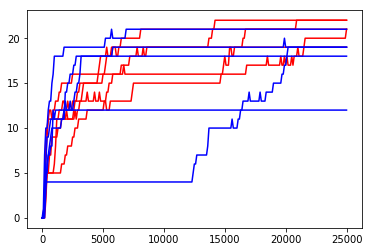

In [118]:
for contact in budContacts:
    plt.plot([i[0] for i in contact[0]],[i[1] for i in contact[0]],color='red')
for contact in nonBudContacts:
    plt.plot([i[0] for i in contact[0]],[i[1] for i in contact[0]],color='blue')

In [121]:
njitters = [atools.jitterLigandContact(c[0],3,'full') for c in nonBudContacts]
bjitters = [atools.jitterLigandContact(c[0],3,'full') for c in budContacts]

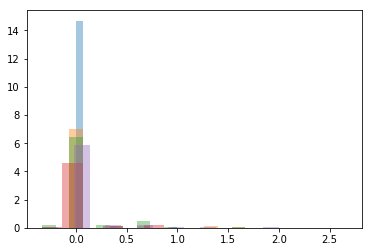

In [146]:
nmeans = []
nsds = []
for c in njitters:
    sns.distplot(c[1][3:],kde=False,norm_hist=True)
    nmeans.append(np.mean(c[1]))
    nsds.append(np.std(c[1]))

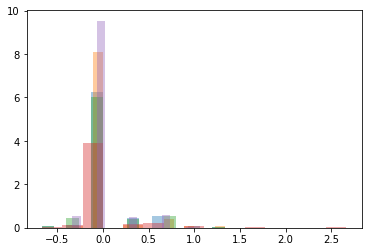

In [147]:
bmeans = []
bsds = []
for c in bjitters:
    sns.distplot(c[1][3:],kde=False,norm_hist=True)
    bmeans.append(np.mean(c[1]))
    bsds.append(np.std(c[1]))

In [148]:
print(np.mean(bmeans),np.mean(nmeans))

(0.08054421768707502, 0.06421768707483004)


In [149]:
print(np.mean(bsds),np.mean(nsds))

(0.34008746005942236, 0.30525434831424775)
